# Visualization of the results

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Research Question 1

In [38]:
kp20 = pd.read_csv('experiments/knapsack_maxweight-20_numitems-10.csv')
kp200 = pd.read_csv('experiments/knapsack_maxweight-200_numitems-100.csv')

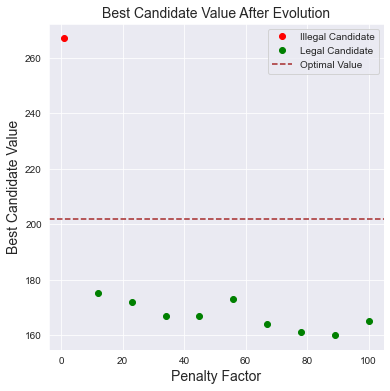

In [138]:
kp = kp200
num_items = 200
optimal_val = 202

legal_candidates = kp[kp['best_candidate_solution_legal'] == True]
illegal_candidates = kp[kp['best_candidate_solution_legal'] == False]

# Plot the data
plt.figure(figsize=(6, 6))
plt.plot(illegal_candidates['penalty_factor'], illegal_candidates['best_candidate_value'], 'ro', label='Illegal Candidate')
plt.plot(legal_candidates['penalty_factor'], legal_candidates['best_candidate_value'], 'go', label='Legal Candidate')

# Add a horizontal line at y = 24
plt.axhline(y=optimal_val, color='brown', linestyle='--', label='Optimal Value')
# Annotate the optimal value
# plt.text(0.5, 25, 'Optimal Vallue', color='yellow')
# bins = range(1,11)
# plt.xticks(ticks = bins, labels = bins, fontsize = 11)

# Add labels and legend
plt.xlabel('Penalty Factor',fontsize=14)
plt.ylabel('Best Candidate Value',fontsize=14)
plt.title(f'Best Candidate Value After Evolution',fontsize=14)
plt.legend()
plt.savefig(f'figures/kp_best_value_{num_items}.png')

# Show the plot
plt.grid(True)
plt.show()

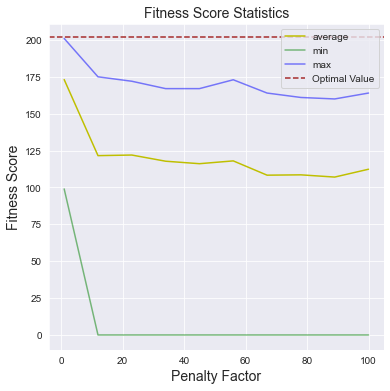

In [139]:
legal_candidates = kp[kp['best_candidate_solution_legal'] == True]
illegal_candidates = kp[kp['best_candidate_solution_legal'] == False]

# Plot the data
plt.figure(figsize=(6, 6))
plt.plot(kp['penalty_factor'], kp['average'], 'y-', label='average')
plt.plot(kp['penalty_factor'], kp['min'], 'g-', label='min',alpha=0.5)
plt.plot(kp['penalty_factor'], kp['max'], 'b-', label='max',alpha=0.5)

# Add a horizontal line at y = 24
plt.axhline(y=optimal_val, color='brown', linestyle='--', label='Optimal Value')

# # Annotate the optimal value
# plt.text(0.5, 25, 'Optimal Solution', color='green')

# bins = range(1,11)
# plt.xticks(ticks = bins, labels = bins, fontsize = 11)

# Add labels and legend
plt.xlabel('Penalty Factor',fontsize=14)
plt.ylabel('Fitness Score',fontsize=14)
plt.title('Fitness Score Statistics',fontsize=14)
plt.legend()
plt.savefig(f'figures/kp_fitness_scores_{num_items}.png')

# Show the plot
plt.grid(True)
plt.show()

### Research Question 2

In [88]:
tsp5 = pd.read_csv('experiments/tsp_numcities-5.csv')
tsp10 = pd.read_csv('experiments/tsp_numcities-10.csv')
tsp20= pd.read_csv('experiments/tsp_numcities-20.csv')
tsp50 = pd.read_csv('experiments/tsp_numcities-50.csv')

In [89]:
tsp = tsp5

In [93]:
tsp_global = pd.merge(tsp5,tsp10, on='selection_strategy', suffixes=('_5','_10'))
tsp_global = pd.merge(tsp_global,tsp20, on='selection_strategy', suffixes=('','_20'))
tsp_global = pd.merge(tsp_global,tsp50, on='selection_strategy', suffixes=('','_50'))
tsp_global.transpose().to_csv('tsp_summary.csv')

### Research Question 3

In [6]:
kp_mut_10 = pd.read_csv('experiments/mutation_probs_tuning__kp_maxweight-20_numitems-10.csv')
kp_mut_100 = pd.read_csv('experiments/mutation_probs_tuning__kp_maxweight-200_numitems-100.csv')

tsp_mut_10 = pd.read_csv('experiments/mutations_probs_tuning__tsp_numcities-10.csv')
tsp_mut_20 = pd.read_csv('experiments/mutations_probs_tuning__tsp_numcities-20.csv')

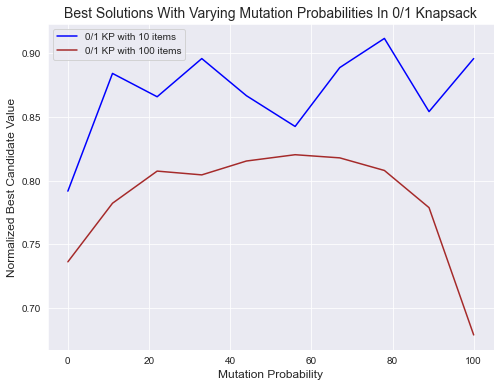

In [11]:
kp_mut = kp_mut_100
optimal_val = 202
num_items = 100

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(kp_mut_10['mutation_probability']*100, kp_mut_10['average']/24, linestyle = '-', color='blue', label='0/1 KP with 10 items')
plt.plot(kp_mut_100['mutation_probability']*100, kp_mut_100['average']/202, linestyle = '-', color='brown', label='0/1 KP with 100 items')
# plt.plot(kp_mut['mutation_probability']*100, kp_mut['min'], 'g-', label='min',alpha=0.5)
# plt.plot(kp_mut['mutation_probability']*100, kp_mut['max'], 'g-', label='max',alpha=0.5)

# Add a horizontal line at y = 24
# plt.axhline(y=optimal_val, color='brown', linestyle='--', label='Optimal Value')

# # Annotate the optimal value
# plt.text(0.5, 25, 'Optimal Solution', color='green')

# bins = range(1,11)
# plt.xticks(ticks = bins, labels = bins, fontsize = 11)

# Add labels and legend
plt.xlabel('Mutation Probability',fontsize=12)
plt.ylabel('Normalized Best Candidate Value',fontsize=12)
plt.title('Best Solutions With Varying Mutation Probabilities In 0/1 Knapsack',fontsize=14)
plt.legend()
plt.savefig(f'figures/kp_mutation_quality.png')

# Show the plot
plt.grid(True)
plt.show()

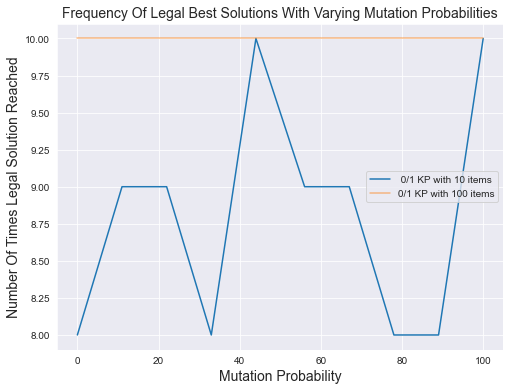

In [164]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(kp_mut_10['mutation_probability'] * 100, kp_mut_10['legal_reached'], '-', label=' 0/1 KP with 10 items')
plt.plot(kp_mut_100['mutation_probability'] * 100, kp_mut_100['legal_reached'], '-', label='0/1 KP with 100 items', alpha=0.5)

# Add labels and legend
plt.xlabel('Mutation Probability', fontsize=14)
plt.ylabel('Number Of Times Legal Solution Reached', fontsize=14)
plt.title('Frequency Of Legal Best Solutions With Varying Mutation Probabilities', fontsize=14)
plt.legend()
plt.savefig(f'figures/kp_mutation_legal_reached.png')

# Show the plot
plt.grid(True)
plt.show()


In [169]:
kp_mut_100

,mutation_probability,min,average,max,legal_reached
0,0.00,130,148.7,164,10
1,0.11,151,158.0,166,10
2,0.22,155,163.1,174,10
3,0.33,149,162.5,171,10
4,0.44,156,164.7,171,10
5,0.56,158,165.7,176,10
6,0.67,152,165.2,171,10
7,0.78,149,163.2,176,10
8,0.89,134,157.3,172,10
9,1.00,124,137.1,147,10


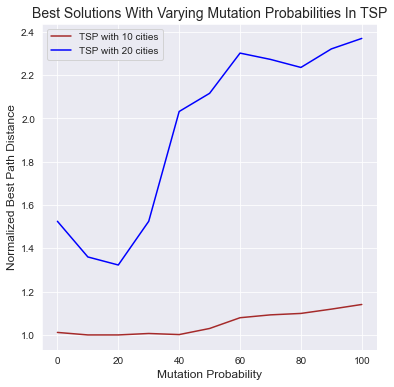

In [10]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.plot(tsp_mut_10['mutation_probability'] * 100, tsp_mut_10['average']/6.04, linestyle = '-', color='brown', label='TSP with 10 cities')
# plt.plot(tsp_mut_10['mutation_probability'] * 100, tsp_mut_10['min']/6.04, '-', label='TSP with 10 cities')
# plt.plot(tsp_mut_10['mutation_probability'] * 100, tsp_mut_10['max']/6.04, '-', label='TSP with 10 cities')
plt.plot(tsp_mut_20['mutation_probability'] * 100, tsp_mut_20['average']/6.19, 'b-', label='TSP with 20 cities')
# plt.plot(tsp_mut_20['mutation_probability'] * 100, tsp_mut_20['min']/6.19, '-', label='TSP with 20 cities')
# plt.plot(tsp_mut_20['mutation_probability'] * 100, tsp_mut_20['max']/6.19, '-', label='TSP with 20 cities')

# Add a horizontal line at y = 24
# plt.axhline(y=optimal_val, color='brown', linestyle='--', label='Optimal Value')

# # Annotate the optimal value
# plt.text(0.5, 25, 'Optimal Solution', color='green')

# bins = range(1,11)
# plt.xticks(ticks = bins, labels = bins, fontsize = 11)

# Add labels and legend
plt.xlabel('Mutation Probability', fontsize=12)
plt.ylabel('Normalized Best Path Distance', fontsize=12)
plt.title('Best Solutions With Varying Mutation Probabilities In TSP', fontsize=14)
plt.legend()
plt.savefig(f'figures/tsp_mutation_quality.png')

# Show the plot
plt.grid(True)
plt.show()